In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
import warnings
warnings.simplefilter('ignore')


### Задание 6_1
#### Решите линейную систему:


$\left|\begin{array}{cccc}
1 & 2 &  3\\
4 & 0 & 6\\
7 & 8 & 9
\end{array}\right|\cdot X = \left|\begin{array}{cccc}12\\2\\1\end{array}\right|$

In [3]:
A = np.array([
    [1, 2, 3],
    [4, 0, 6],
    [7, 8, 9]
])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

### Задание 6_2
#### Найти псевдорешение системы уравнений
#### $x + 2y - z = 1\\
     3x – 4y = 7\\
     8x – 5y + 2z = 12\\
     2x – 5z = 7\\
     11x +4y – 7z = 15$

In [4]:
A = np.array([
    [1, 2, -1],
    [3, -4, 0],
    [8, -5, 2],
    [2, 0, 5],
    [11, 4, -7]
])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)[0]

array([1.62845302, 0.06991892, 0.5123584 ])

### Задание 6_3
#### Сколько решений имеет линейная система:


$\left|\begin{array}{cccc}1 & 2 &  3\\4 & 5 & 6\\7 & 8 & 9\end{array}\right|\cdot X = \left|\begin{array}{cccc}12\\2\\1\end{array}\right|$

#### Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

In [5]:
A = np.array([
    [1, 2, 3],
    [4, 1, 6],
    [7, 8, 9]
])
B = np.array([[12, 2, 1]])
C = np.concatenate((A, B.T), axis=1) # расширенная матрица матрицы А
n = 3 # количество неизвестных
# print(np.linalg.matrix_rank(A))
# print(np.linalg.matrix_rank(C))
A_rank = np. linalg.matrix_rank(A) # ранг исходной матрицы
C_rank = np.linalg.matrix_rank(C)  # ранг расширенной матрицы

## По теореме Корнекера-Капелли: 


Система линейных алгебраических уравнений совместна тогда и только тогда, когда ранг матрицы этой системы равен рангу её расширенной матрицы.



## Следствие из теоремы Кронекера-Капелли о числе решений. 
Пусть для системы m линейных уравнений с n неизвестными выполнено условие совместности, то есть ранг матрицы из коэффициентов системы равен рангу её расширенной матрицы. Тогда верно следующее.

* Если ранг матрицы равен числу неизвестных , то система имеет единственное решение.
* Если ранг матрицы системы меньше числа неизвестных , то система имеет бесконечно много решений, а именно: некоторым n - r неизвестным можно придавать произвольные значения, тогда оставшиеся r неизвестных определятся уже единственным образом.



In [6]:
print('ОТВЕТ:')
if A_rank == C_rank:
    if A_rank == n:
        print('Система имеет единтсвенное решение')
    elif A_rank < n:
        print('Система имеет бесконечное множество решений')
else:
    print('Система не имеет решений')

ОТВЕТ:
Система имеет единтсвенное решение


### Задание 6_4
#### Вычислите LU-разложение матрицы:


$\left|\begin{array}{cccc}1 & 2 &  3\\2 & 16 & 21\\4 & 28 & 73\end{array}\right|$


In [7]:
import scipy 
import scipy.linalg

In [9]:
A = np.array([
    [1, 2, 3],
    [2, 16, 21],
    [4, 28, 73]
])
P, L, U = scipy.linalg.lu(A)
print(L)
print()
print(U)

A1 = np.dot(L, U)
print()
print(A1)


[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]

[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]

[[ 4. 28. 73.]
 [ 1.  2.  3.]
 [ 2. 16. 21.]]


### Задание 6_5
#### Найдите нормальное псевдорешение недоопределенной системы:
#### $x + 2y – z = 1\\
     8x – 5y + 2z = 12$
     
#### Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум

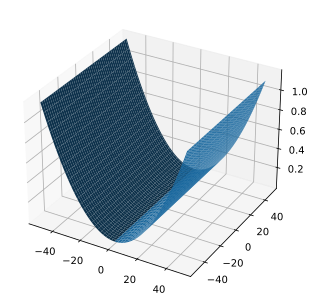

In [10]:
def Q(x, y, z):
  return (x**2 + y**2 + z**2)
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = Axes3D(fig)
X = np.arange(-50, 50, 1)
Y = np.arange(-50, 50, 1)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, Q(X, 5*X - 14, 21*X - 1))
show()

In [11]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
np.linalg.lstsq(A, B)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

### Задание 6_1
#### Найдите одно из псевдорешений вырожденной системы::


$\left|\begin{array}{cccc}1 & 2 &  3\\4 & 5 & 6\\7 & 8 & 9\end{array}\right|\cdot X = \left|\begin{array}{cccc}1\\5\\11\end{array}\right|$

#### Попробуйте также отыскать и нормальное псевдорешение.


In [12]:
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
np.linalg.lstsq(A, B)[0]

array([ 1.25,  0.5 , -0.25])